<a href="https://colab.research.google.com/github/bulnes42/csulb-cecs456-finalProject/blob/main/FinalProject_AlexNetModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import os 
import time
import tensorflow as tf
from tensorflow import keras
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image



In [2]:

# add directory information for each class
dataset_folder = "drive/MyDrive/dataset"
abdomenCT_folder = "drive/MyDrive/dataset/AbdomenCT"
breastMRI_folder = "drive/MyDrive/dataset/BreastMRI"
chestCT_folder = "drive/MyDrive/dataset/ChestCT"
cxr_folder = "drive/MyDrive/dataset/CXR"
hand_folder = "drive/MyDrive/dataset/Hand"
headCT_folder = "drive/MyDrive/dataset/HeadCT"

# Create dictionary of classes
classes = {
    'AbdomenCT': 0, 
    'BreastMRI': 1, 
    'ChestCT': 2, 
    'CXR': 3,
    'Hand': 4, 
    'HeadCT': 5
}


In [ ]:
# load images into lists
def load_images_from_folder(folder, label_list, label):
  images = []
  for image in os.listdir(folder):
    images.append(image)
    label_list.append(classes.get(label))
  return images

# Load images into lists and accumulate number of total images
total_images = 0
abdomentCT_labels = []
abdomentCT_images = load_images_from_folder(abdomenCT_folder, abdomentCT_labels, 'AbdomentCT')
total_images += len(abdomentCT_labels)

breastMRI_lables = []
breastMRI_images = load_images_from_folder(breastMRI_folder, breastMRI_lables, 'BreastMRI')
total_images += len(breastMRI_lables)

chestCT_labels = []
chestCT_images = load_images_from_folder(chestCT_folder, chestCT_labels, 'ChestCT')
total_images += len(chestCT_labels)

cxr_labels = []
cxr_images = load_images_from_folder(cxr_folder, cxr_labels, 'CXR')
total_images += len(cxr_labels)

hand_labels = []
hand_images = load_images_from_folder(hand_folder, hand_labels, 'Hand')
total_images += len(hand_labels)

headCT_labels = []
headCT_images = load_images_from_folder(headCT_folder, headCT_labels, 'HeadCT')
total_images += len(headCT_labels)



In [ ]:
# print out the images, labels, and percent for each class to see any skewed data
print("abdomentCT images", len(abdomentCT_images))
print("abdomentCT labels ", len(abdomentCT_labels))
abdomenCT_percent = len(abdomentCT_labels)/total_images

print("abdomentCT percent , " + str(abdomenCT_percent))
print("breastMRI images ", len(breastMRI_images))
print("breastMRI labels ", len(breastMRI_lables))
print("breastMRI percent , " + str((len(breastMRI_lables)/total_images)))
print("chestCT images ", len(chestCT_images))
print("chestCT labels ", len(chestCT_labels))
print("chestCT percent ", (len(chestCT_labels)/total_images))
print("cxr images ", len(cxr_images))
print("cxr labels ", len(cxr_labels))
print("cxr percent ", (len(cxr_labels)/total_images))
print("hand images ",len(hand_images))
print("hand labels ", len(hand_labels))
print("hand percent ", (len(hand_labels)/total_images))
print("headCT images ", len(headCT_images))
print("headCT labels ", len(headCT_labels))
print("headCT percent ", (len(headCT_labels)/total_images))

abdomentCT images 10010
abdomentCT labels  10010
abdomentCT percent , 0.16964951528709918
breastMRI images  8964
breastMRI labels  8964
breastMRI percent , 0.15192190359975594
chestCT images  10010
chestCT labels  10010
chestCT percent  0.16964951528709918
cxr images  10020
cxr labels  10020
cxr percent  0.16981899532235104
hand images  10000
hand labels  10000
hand percent  0.16948003525184732
headCT images  10000
headCT labels  10000
headCT percent  0.16948003525184732


In [5]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset_folder, labels='inferred', batch_size=64,image_size=(227, 227))
# Define image parameters

BATCH_SIZE=64
NUM_CLASSES = 6
EPOCHS = 20 # try out a large number then decrease as needed`


Found 59004 files belonging to 6 classes.


['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


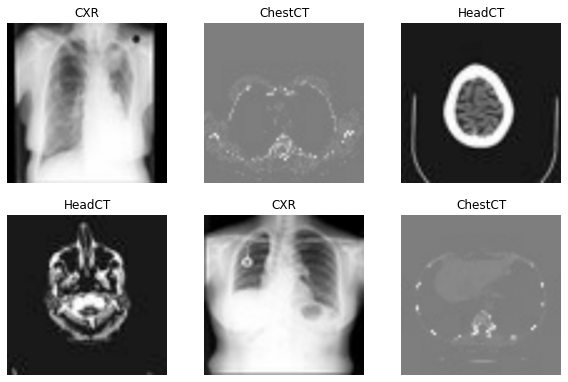

In [ ]:
class_names = dataset.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
dataset.shuffle(58954)
train_size = int(len(dataset)*.7)
validation_size = int(len(dataset)*.2)
test_size = int(len(dataset)*.1)

In [7]:
training_dataset = dataset.take(train_size)
validation_dataset = dataset.skip(train_size).take(validation_size)
test_dataset = dataset.skip(train_size + validation_size).take(test_size)

In [8]:
#build a model
alexnet_model = tf.keras.models.Sequential()
alexnet_model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=[11, 11], strides=[4, 4], activation="relu", padding="same",input_shape=[227, 227, 3]))
alexnet_model.add(tf.keras.layers.BatchNormalization())
alexnet_model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
alexnet_model.add(keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
alexnet_model.add(keras.layers.BatchNormalization())
alexnet_model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
alexnet_model.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
alexnet_model.add(keras.layers.BatchNormalization())
alexnet_model.add(keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
alexnet_model.add(keras.layers.BatchNormalization())
alexnet_model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
alexnet_model.add(keras.layers.BatchNormalization())
alexnet_model.add(keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)))
alexnet_model.add(keras.layers.Flatten())
alexnet_model.add(keras.layers.Dense(4096, activation='relu'))
alexnet_model.add(keras.layers.Dropout(0.5))
alexnet_model.add(keras.layers.Dense(4096, activation='relu'))
alexnet_model.add(keras.layers.Dropout(0.5))
alexnet_model.add(tf.keras.layers.Dense(units = 6, activation = "softmax"))
alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 57, 57, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1024      
 hNormalization)                                                 
                                                        

In [9]:
alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 57, 57, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1024      
 hNormalization)                                                 
                                                        

In [10]:
alexnet_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
history = alexnet_model.fit(training_dataset, validation_data=validation_dataset, batch_size=256, epochs=20)

Epoch 1/20
645/645 [==============================] - 257s 383ms/step - loss: 1.4351 - accuracy: 0.9648 - val_loss: 0.8466 - val_accuracy: 0.9892
Epoch 2/20
645/645 [==============================] - 42s 65ms/step - loss: 0.4259 - accuracy: 0.9921 - val_loss: 0.4860 - val_accuracy: 0.9890
Epoch 3/20
645/645 [==============================] - 42s 66ms/step - loss: 0.7620 - accuracy: 0.9899 - val_loss: 1.5471 - val_accuracy: 0.9772
Epoch 4/20
645/645 [==============================] - 42s 65ms/step - loss: 0.8761 - accuracy: 0.9919 - val_loss: 0.2267 - val_accuracy: 0.9975
Epoch 5/20
645/645 [==============================] - 42s 65ms/step - loss: 0.3720 - accuracy: 0.9967 - val_loss: 0.9867 - val_accuracy: 0.9916
Epoch 6/20
645/645 [==============================] - 42s 65ms/step - loss: 0.3069 - accuracy: 0.9974 - val_loss: 10.8553 - val_accuracy: 0.9111
Epoch 7/20
645/645 [==============================] - 43s 66ms/step - loss: 1.0514 - accuracy: 0.9946 - val_loss: 0.2448 - val_accura

In [12]:
test_loss, test_accuracy = alexnet_model.evaluate(test_dataset)
print("test loss = ", test_loss)
print("test accuray = ", test_accuracy)

92/92 [==============================] - 47s 278ms/step - loss: 0.2737 - accuracy: 0.9997
test loss =  0.27372273802757263
test accuray =  0.999660313129425


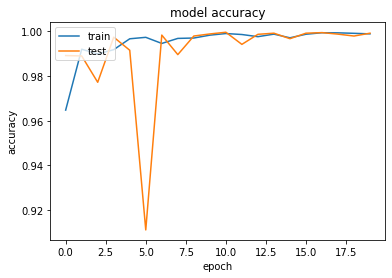

In [13]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

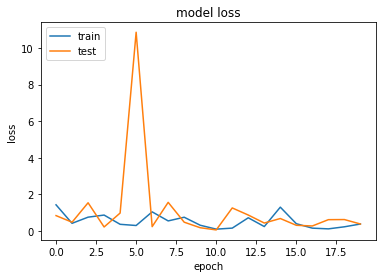

In [14]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()